In [1]:
import pandas as pd
import seaborn as sns
 #pandas.someMethod()
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
import numpy as np
import scikitplot as skplt
%matplotlib notebook
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [2]:
data = pd.read_csv('toy_data.csv') # .. = Get our parent folder.

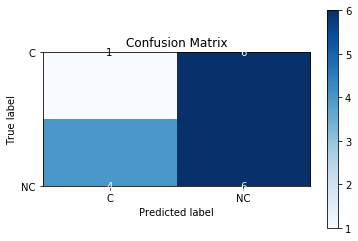

In [3]:
gt = ["C","NC","C","C","C","NC","NC","NC","NC","C","NC","NC","C","C","NC","NC","NC"]
pred = [ "NC", "NC", "NC", "NC", "C", "NC", "NC", "C", "NC", "NC", "C","C", "NC", "NC", "NC", "C", "NC"]
skplt.metrics.plot_confusion_matrix(gt, pred,labels=["C","NC"])


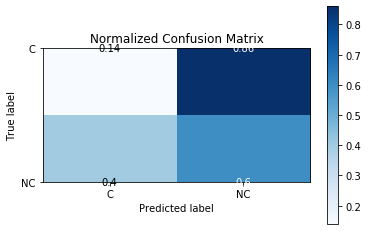

In [4]:
skplt.metrics.plot_confusion_matrix(gt, pred,normalize=True)

In [5]:
sklearn.model_selection.train_test_split(gt,shuffle=False)

[['C', 'NC', 'C', 'C', 'C', 'NC', 'NC', 'NC', 'NC', 'C', 'NC', 'NC'],
 ['C', 'C', 'NC', 'NC', 'NC']]

In [6]:
data.head()

,x,y
0,26,-9.210066
1,58,-120.894408
2,259,487.066020
3,309,595.576618
4,323,376.560146


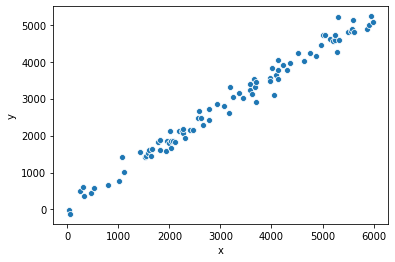

In [7]:
sns.scatterplot(x="x",y="y",data=data)

In [8]:
split =sklearn.model_selection.train_test_split(data,shuffle=False)
train=split[0]
test=split[1]

In [9]:
model = LinearRegression()
train_x = train['x']
train_y = train['y']
test_x = test['x']
test_y = test['y']
print("Shape before reshaping:")
print("Train X", train_x.shape)
print("Train Y", train_y.shape)
print("\n")
train_x = np.asarray(train_x).reshape(-1,1)
train_y = np.asarray(train_y).reshape(-1,1)

test_x = np.asarray(test_x).reshape(-1,1)
test_y = np.asarray(test_y).reshape(-1,1)

print("Shape after reshaping:")
print("Train X: ", train_x.shape)
print("Train Y: ", train_y.shape)
print("\n")# Call fit to train the Linear Regression model on our training data,providing training targets.
reg_model = model.fit(X=train_x,y=train_y)


Shape before reshaping:
Train X (67,)
Train Y (67,)


Shape after reshaping:
Train X:  (67, 1)
Train Y:  (67, 1)




In [10]:
data.describe()

,x,y
count,90.000000,90.000000
mean,3177.588889,2874.116131
std,1640.498594,1416.753542
min,26.000000,-120.894408
25%,1971.000000,1828.711111
50%,3181.500000,2877.751049
75%,4484.000000,4038.939899
max,5987.000000,5230.699704


In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [12]:
 mean_squared_error( train_y, model.predict(train_x) )
pred_y = reg_model.predict(test_y)

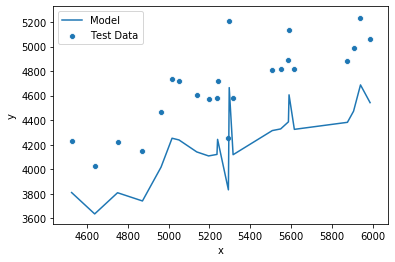

In [13]:
sns.lineplot(x=test['x'], y=pred_y.ravel(), label='Model')
sns.scatterplot(x=test['x'], y=test['y'], label='Test Data')

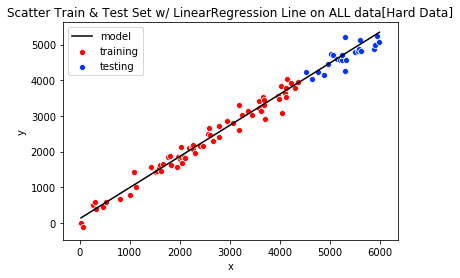

In [14]:
df = pd.read_csv('toy_data.csv')
whole_x = np.asarray( df['x'] ).reshape(-1,1)
whole_y = np.asarray( df['y'] ).reshape(-1,1)
fig, ax = plt.subplots()
plt.title("Scatter Train & Test Set w/ LinearRegression Line on ALL data[Hard Data]")
sns.lineplot( x=df['x'], y=reg_model.predict( whole_x ).ravel(), ax=ax,label='model')# Line plot of just training data. Red Data points
sns.scatterplot(x=train['x'], y=train['y'], ax=ax, c=[[1, 0, 0]],label='training')# Line plot of just testing data. Blue-ish data points.
sns.scatterplot(x=test['x'], y=test['y'], ax=ax, c=[[0, 0.2, 1]],label='testing')# Colour the line plot in black.
plt.gca().get_lines()[0].set_color("black")# Show our legend.
ax.legend()
